In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

In [2]:
fish_5 = np.array([2,3,4,5,6])
np.random.choice(fish_5, size=1, replace=False)

array([4])

In [3]:
np.random.choice(fish_5, size=3, replace=False)

array([6, 3, 4])

In [4]:
np.random.choice(fish_5, size=3, replace=False)

array([3, 2, 4])

In [5]:
np.random.seed(1)
np.random.choice(fish_5, size=3, replace=False)

array([4, 3, 6])

In [6]:
# 同じ乱数種だと同じランダムサンプリングが行われる
np.random.seed(1)
np.random.choice(fish_5, size=3, replace=False)

array([4, 3, 6])

In [7]:
# 標本平均
np.random.seed(1)
np.mean(np.random.choice(fish_5, size=3, replace=False))

4.333333333333333

In [8]:
fish_100000 = pd.read_csv("./sample/3-4-1-fish_length_100000.csv")["length"]
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [9]:
len(fish_100000)

100000

In [10]:
sampling_result = np.random.choice(fish_100000, size=10, replace=False)
sampling_result

array([4.091, 5.465, 3.426, 4.287, 4.244, 4.282, 4.29 , 5.087, 2.769,
       5.296])

In [11]:
sp.mean(sampling_result)

4.3235970793805025

In [12]:
# 母集団分布
sp.mean(fish_100000)

4.000

In [13]:
# 母集団標準偏差
sp.std(fish_100000, ddof=0)

0.800

In [14]:
sp.var(fish_100000, ddof=0)

0.640

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


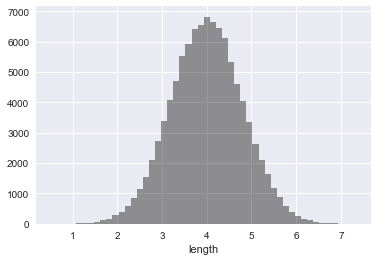

In [15]:
sns.distplot(fish_100000, kde=False, color='black')

In [16]:
# 母集団の確率密度関数
x = np.arange(start=1, stop=7.1, step=0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [17]:
stats.norm.pdf(x=x, loc=4, scale=0.8)

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

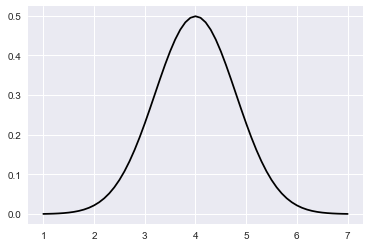

In [18]:
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color='black')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


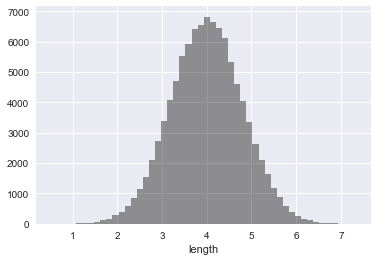

In [19]:
# 母集団ヒストグラムと母集団分布
#plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color='black')
sns.distplot(fish_100000, kde=False, color='black')

In [20]:
# 正規分布に従う乱数を発生させる関数　
sampling_norm = stats.norm.rvs(loc=4, scale=0.8, size=10)
sampling_norm

array([4.037, 3.498, 4.322, 5.295, 5.499, 2.905, 4.437, 4.665, 3.786,
       4.569])

In [21]:
sp.mean(sampling_norm)

4.301401664573935

In [22]:
# 母集団分布
population = stats.norm(loc=4, scale=0.8)

In [23]:
# 標本平均を何度も求める　
sample_mean_array = np.zeros(100000)

In [24]:
np.random.seed(1)
for i in range(0, 100000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = sp.mean(sample)

In [25]:
# 標本平均の平均値
sp.mean(sample_mean_array)

4.000521443446416

In [26]:
# 標本平均の標準偏差
sp.std(sample_mean_array, ddof=1)

0.2531249779717917

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


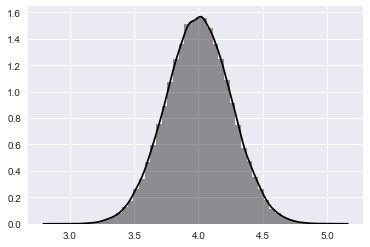

In [27]:
# 標本平均の標本分布
sns.distplot(sample_mean_array, color='black')

In [28]:
# サンプルサイズ大なら標本平均は母平均に近い
# 対象：標本平均
# 変化させるもの：サンプルサイズ
# 調べたいこと：サンプルサイズが大きくなると、標本平均は母平均に近づいていく

size_array = np.arange(start=10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [29]:
sample_mean_array_size = np.zeros(len(size_array))

In [30]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

Text(0,0.5,'sample mean')

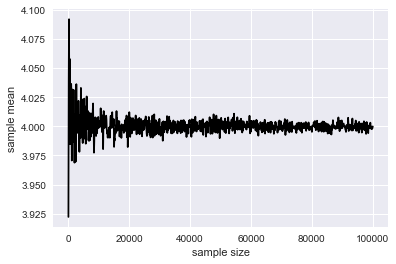

In [31]:
plt.plot(size_array, sample_mean_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

In [32]:
# 標本平均を何度も計算する関数
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = sp.mean(sample)
    return (sample_mean_array)

In [33]:
np.random.seed(1)
sp.mean(calc_sample_mean(size=10, n_trial=10000))

4.004202422791747

In [34]:
# サンプルを変えたときの標本平均の分布
np.random.seed(1)
# サンプルサイズ10
size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({"sample_mean":size_10, "size": np.tile("size 10", 10000)})

# サンプルサイズ20
size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({"sample_mean":size_20, "size": np.tile("size 20", 10000)})

# サンプルサイズ30
size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({"sample_mean":size_30, "size": np.tile("size 30", 10000)})

# サンプルサイズ40
size_40 = calc_sample_mean(size=40, n_trial=10000)
size_40_df = pd.DataFrame({"sample_mean":size_40, "size": np.tile("size 40", 10000)})

# 結合
sim_result = pd.concat([size_10_df, size_20_df, size_30_df, size_40_df])

# 結果の表示
print(sim_result.head())
print(sim_result.tail())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10
      sample_mean     size
9995     3.934803  size 40
9996     4.092747  size 40
9997     3.915622  size 40
9998     4.197651  size 40
9999     3.999650  size 40


In [35]:
len(sim_result)

40000

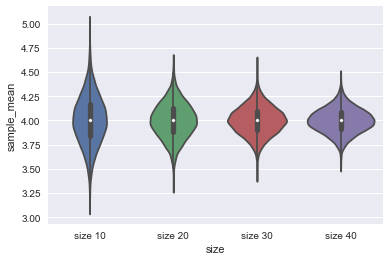

In [36]:
sns.violinplot(x="size", y="sample_mean", data=sim_result)

In [38]:
size_array = np.arange(start=2, stop=102, step=2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [39]:
sample_mean_std_array = np.zeros(len(size_array))

In [40]:
# 試行回数100回
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof=1)

Text(0,0.5,'mean_std value')

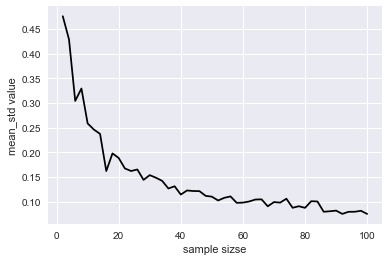

In [41]:
# 横軸　サンプルサイズ
# 縦軸　標本平均の標準偏差
plt.plot(size_array, sample_mean_std_array, color='black')
plt.xlabel("sample sizse")
plt.ylabel("mean_std value")

In [42]:
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0,0.5,'mean_std value')

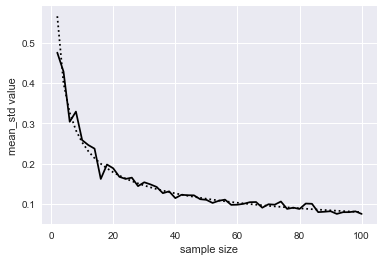

In [44]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, standard_error, color='black', linestyle='dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

In [45]:
sample_var_array = np.zeros(10000)

In [46]:
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = sp.var(sample, ddof=0)

In [47]:
sp.mean(sample_var_array)

0.5746886877332101

In [48]:
# 「不偏分散」を格納する入れ物の
unbias_var_array = np.zeros(10000)
# 「データを10個選んで不偏分散を求める」試行を10000回繰り返す
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = sp.var(sample, ddof=1)
# 不偏分散の平均値
sp.mean(unbias_var_array)

0.6385429863702334

In [49]:
# サンプルサイズ大なら、不偏分散は母分散に近い
# 対象　不偏分散
# 変化させるもの　サンプルサイズ
# 調べたいこと
# サンプルサイズがおおきくなると、不偏分散は母分散に近づいていく
size_array = np.arange(start=10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [50]:
unbias_var_array_size = np.zeros(len(size_array))

In [51]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof=1)

Text(0,0.5,'unbias var')

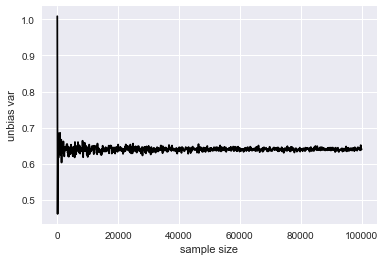

In [52]:
plt.plot(size_array, unbias_var_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


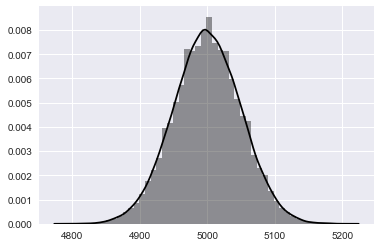

In [54]:
# 大数の法則
# 標本の大きさが大きくなるにつれて、標本平均が母平均に近づく近づき方を表現した法則

# 中心極限定理
# 母集団分布がなんであっても、サンプルサイズが大きいときには、確率変数の和は正規分布に近いものとなる。

# 確率分布 {P(Open), P(Close)} = {1/2, 1/2}のドアを10000回観測するとき、ドアがOpenとなった分布をとる。

# サンプルサイズと試行回数
n_size = 10000
n_trial = 50000

door = np.array([0, 1])
count_door = np.zeros(n_trial)

# ドアをn_size回観測する試行をn_trial回行う
np.random.seed(1)
for i in range(0, n_trial):
    count_door[i] = np.sum(np.random.choice(door, size=n_size, replace=True))
    
# ヒストグラム
sns.distplot(count_door, color='black')

In [55]:
"""6章 正規分布とその応用"""
print(sp.pi)
print(sp.exp(1))

3.141592653589793
2.718281828459045


In [56]:
x = 3
mu = 4
sigma = 0.8

1 / (sp.sqrt(2 * sp.pi * sigma**2)) * sp.exp(-((x - mu)**2) / (2 * sigma**2))

0.22831135673627742

In [57]:
# 正規分布(確率密度関数)
stats.norm.pdf(loc=4, scale=0.8, x=3)

0.2283113567362774

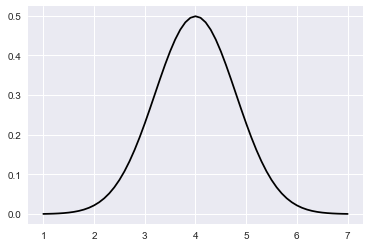

In [59]:
x_plot = np.arange(start=1, stop=7.1, step=0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8), color='black')

In [60]:
# 標本がある値以下となる割合
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc=4, scale=0.8, size=100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [61]:
sp.sum(simulated_sample <= 3)

10371

In [62]:
sp.sum(simulated_sample <= 3) / len(simulated_sample)

0.10371

In [63]:
# 累積度数分布
stats.norm.cdf(loc=4, scale=0.8, x=3)

0.10564977366685535

In [64]:
stats.norm.cdf(loc=4, scale=0.8, x=4)

0.5

In [37]:
# 下側パーセント点
stats.norm.ppf(loc=4, scale=0.8, q = 0.025)

2.4320288123679563

In [39]:
sitagawa = stats.norm.cdf(loc=4, scale=0.8, x=3)
stats.norm.ppf(loc=4, scale=0.8, q=sitagawa)

3.0000000000000004

In [41]:
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

In [42]:
# t値のヒストグラム
# サンプルサイズ10, 試行回数10000回

np.random.seed(1)
# t値を格納する入れ物　
t_value_array = np.zeros(10000)
# 正規分布
norm_dist = stats.norm(loc=4, scale=0.8)

# シミュレーション
for i in range(0, 10000):
    sample = norm_dist.rvs(size=10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof=1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


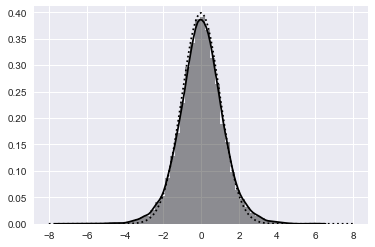

In [43]:
# t値のヒストグラムと標準正規分布
sns.distplot(t_value_array, color='black')
x = np.arange(start=-8, stop=8.1, step=0.1)
plt.plot(x, stats.norm.pdf(x=x), color='black', linestyle='dotted')

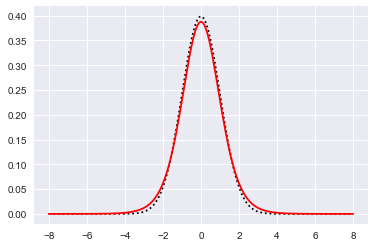

In [44]:
# t値の標本分布=t分布
# t(n)の分散=n/(n-2)
# 自由度nが大きいとき分散は1にちかづき、t分布は標準正規分布になる

# 標準正規分布
plt.plot(x, stats.norm.pdf(x=x), color='black', linestyle='dotted')
# t分布
plt.plot(x, stats.t.pdf(x=x, df=9), color='red')

In [46]:
# 推定
fish = pd.read_csv("./data/3-7-1-fish_length.csv")["length"]
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

In [47]:
# 点推定　不編成　一致性があるからできる
mu = sp.mean(fish)
mu

4.187

In [55]:
sigma_2 = sp.var(fish, ddof=1)
print(sigma_2)
print(sp.sqrt(sigma_2))

0.6803017080832622
0.8248040422326155


In [56]:
# 区間推定

df = len(fish) - 1 # 自由度
print(df)

sigma = sp.sqrt(sigma_2)
se = sigma / sp.sqrt(len(fish)) # 標準誤差
print(se)

# 信頼区間
interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)
print(interval)

9
0.2608259396768776
(3.597010056835825, 4.777068592173221)


In [57]:
# 97.5%点
t_975 = stats.t.ppf(q=0.975, df=df)
t_975

2.2621571627409915

In [58]:
# 下側信頼限界
lower = mu - t_975 * se
lower

3.597010056835825

In [59]:
# 上側信頼限界
upper = mu + t_975 * se
upper

4.777068592173221

In [60]:
# 標本における分散が大きければ、「データが平均値から離れている→平均値をあまり信頼できない」

se2 = (sigma*10) / sp.sqrt(len(fish))
stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se2)

(-1.7132533521824618, 10.087332001191509)

In [61]:
# サンプルサイズが大きければ、標本平均を信頼できるようになる

df2 = (len(fish)*10) - 1
se3 = sigma / sp.sqrt(len(fish)*10)
stats.t.interval(alpha=0.95, df=df2, loc=mu, scale=se3)

(4.0233803082774395, 4.350698340731607)

In [62]:
# 99%信頼区間→推定幅が広い
stats.t.interval(alpha=0.99, df=df, loc=mu, scale=se)

(3.3393979149413977, 5.034680734067649)

In [66]:
# 95%信頼区間→区間推定を複数回繰り返す。母数が信頼区間に入っている確率が95%

#20000回シミュレーション
be_included_array = np.zeros(20000, dtype="bool")
print(be_included_array)

# 信頼区間が母平均を含んでいたらtrue
np.random.seed(1)
norm_dist = stats.norm(loc=4, scale=0.8)
for i in range(0, 20000):
    sample = norm_dist.rvs(size=10)
    df = len(sample) - 1
    mu = sp.mean(sample)
    std = sp.std(sample, ddof=1)
    se = std / sp.sqrt(len(sample))
    interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)
    if (interval[0] <= 4 and interval[1] >= 4):
        be_included_array[i] = True

[False False False ... False False False]


In [67]:
# 割合
sum(be_included_array) / len(be_included_array)

0.948

In [72]:
# t検定
# ある値と標本平均の差の起きる確率を見て、差があるかチェック
junk_food = pd.read_csv("./data/3-8-1-junk-food-weight.csv")["weight"]
print(junk_food.head())

# t値
mu = sp.mean(junk_food)
print(mu)
df = len(junk_food) - 1
print(df)
sigma = sp.std(junk_food, ddof=1)
print(sigma)
se = sigma / sp.sqrt(len(junk_food))
print(se)

t_value = (mu - 50) / se
print(t_value)

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64
55.38496619666667
19
8.756118777591023
1.957927680575589
2.750339683171343
